In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Fashion MNIST

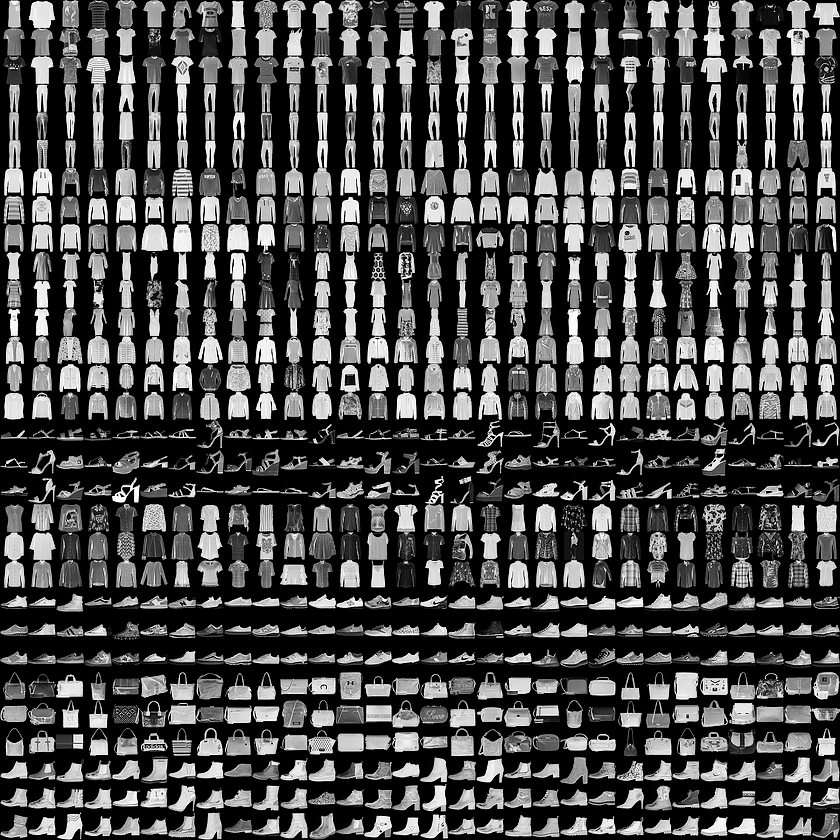

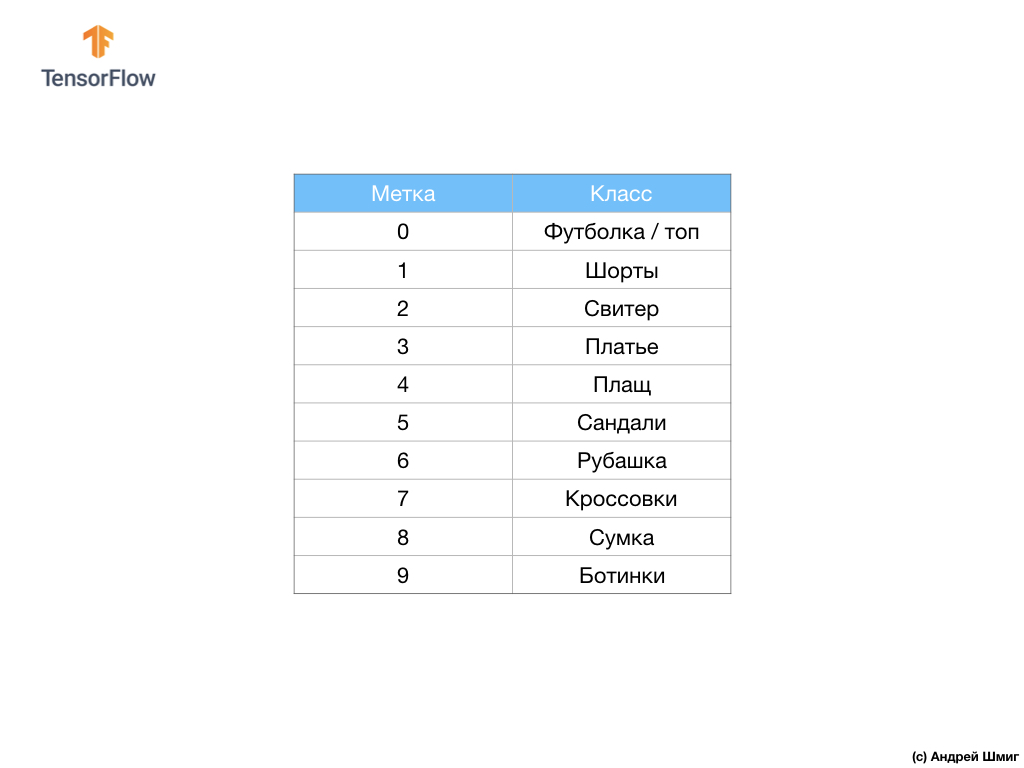

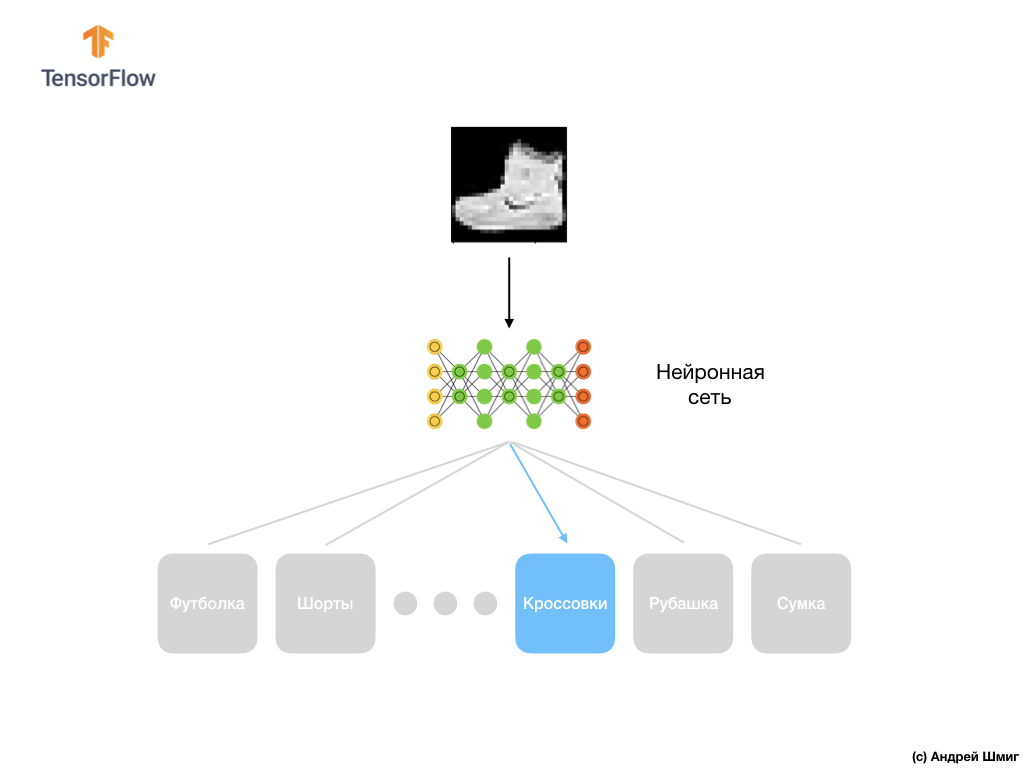

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

# Предобработка данных

In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
y_train.shape, y_test.shape

((60000,), (10000,))

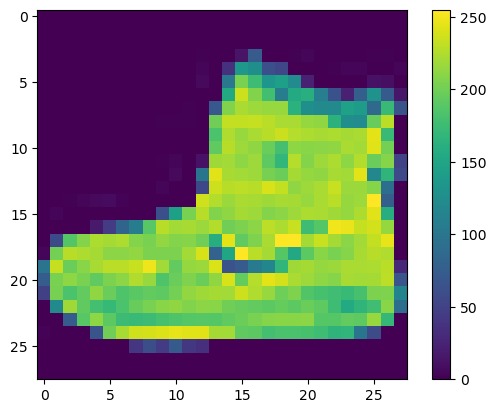

In [12]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

### Нормализация данных

In [14]:
x_train = x_train / 255
x_test = x_test / 255

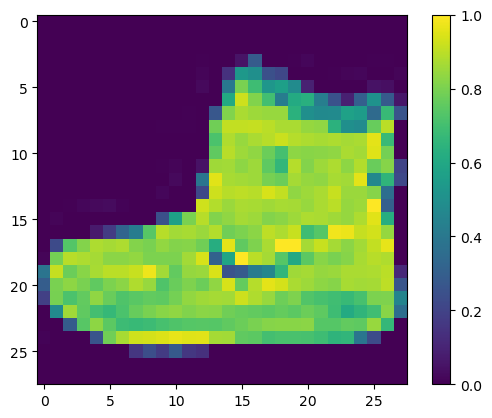

In [16]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

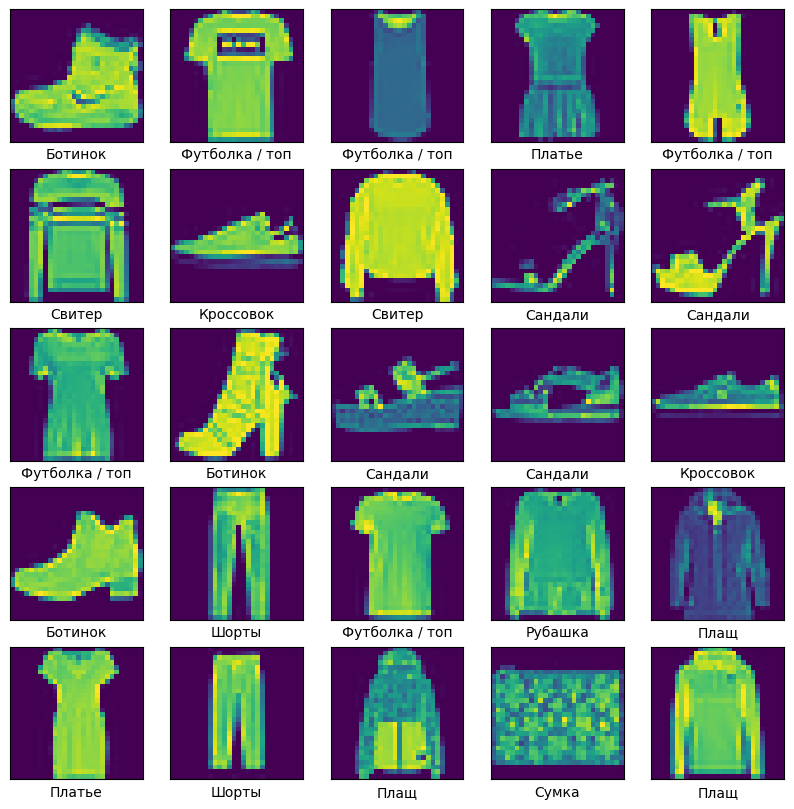

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

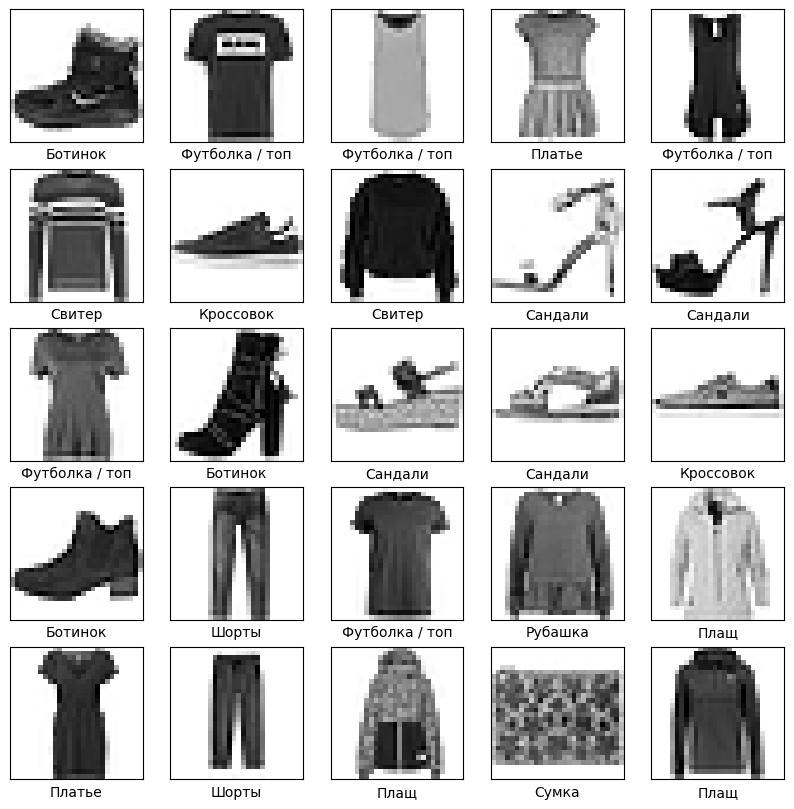

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

### Построение модели нейронной сети 

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

C:\Users\rezed\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Сеть состоит из трёх слоёв:

* входного tf.keras.layers.Flatten - этот слой преобразует изображения размером 28х28 пикселей в 1D-массив размером 784 (28 * 28). На этом слое у нас нет никаких параметров для обучения, так как этот слой занимается только преобразованием входных данных.

* скрытый слой tf.keras.layers.Dense - плотносвязный слой из 128 нейронов. Каждый нейрон (узел) принимает на вход все 784 значения с предыдущего слоя, изменяет входные значения согласно внутренним весам и смещениям во время тренировки и возвращает единственное значение на следующий слой.

* выходной слой ts.keras.layers.Dense - softmax-слой состоит из 10 нейронов, каждый из которых представляет определённый класс элемента одежды. Как и в предыдущем слое, каждый нейрон принимает на вход значения всех 128 нейронов предыдущего слоя. Веса и смещения каждого нейрона на этом слое изменяются при обучении таким образом, чтобы результатирующее значение было в интервале [0,1] и представляло собой вероятность того, что изображение относится к этому классу. Сумма всех выходных значений 10 нейронов равна 1.

In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Перед тем как мы приступим к тренировке модели стоит ещё выполнить несколько настроек. Эти настройки производятся во время сборки модели при вызове метода compile:

* функция потерь - алгоритм измерения того, насколько далеко находится желаемое значение от спрогнозированного.
* функция оптимизации - агоритм "подгонки" внутренних параметров (весов и смещений) модели для минимизации функции потерь;
* метрики - используются для мониторинга процесса тренировки и тестирования. Пример ниже использует такую метрику как точность, процент изображений, которые были корректно классифицированы.

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Тренируем модель

In [32]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6740 - loss: 1.0262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8195 - loss: 0.5328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8385 - loss: 0.4735
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8447 - loss: 0.4508
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8521 - loss: 0.4234
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8563 - loss: 0.4168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8617 - loss: 0.4039
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8624 - loss: 0.3930
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8669 - loss: 0.3830
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8677 - loss: 0.3815


### Проверяем точность

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8617 - loss: 0.3997
Test accuracy: 0.8567000031471252


### Предсказываем и исследуем

In [36]:
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [38]:
predictions[0]

array([1.7215122e-08, 2.0161970e-09, 1.2877943e-09, 4.9239035e-10,
       3.3078922e-09, 2.2893456e-04, 1.1354453e-07, 7.3904620e-04,
       1.3643314e-05, 9.9901819e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [42]:
y_train[0]

9

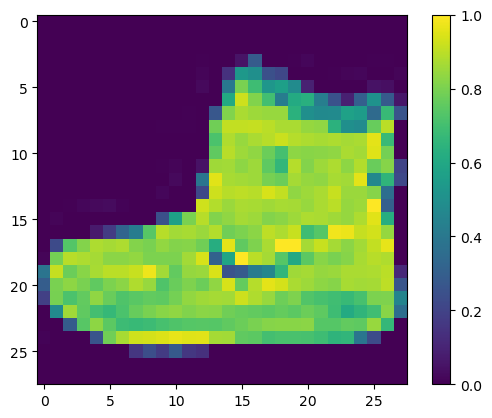

In [44]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [46]:
class_names[np.argmax(predictions[0])]

'Ботинок'

In [60]:
model.save('my_model.keras')

### Задание. 

Создайте модель нейронной сети для распознавания рукописной цифр (). С помощью графического редактора создайте изображение произвольной цифры и выполните распознавание собственной рукописной цифры.